In [56]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("data/housing_datas.csv",sep=";")

#Only 30 rows with na values over 40k rows
data.dropna(inplace=True)

In [57]:
#Seperating datas between 2 categories : The columns of the results, and the features
X = data.drop(["median_house_value"],axis=1)

y = data["median_house_value"]

In [58]:
#Splitting the data with a 80% for training and 20% for testing

from sklearn.model_selection import train_test_split 

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

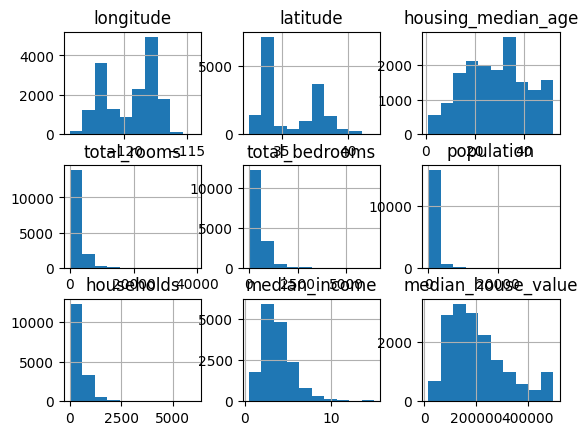

In [59]:
#To look at the data more closely

train_data = (X_train.join(y_train))

train_data.hist()

plt.show()

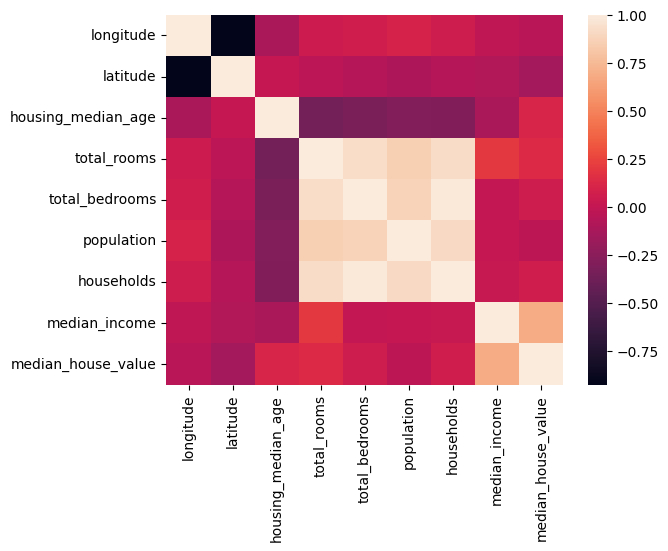

In [60]:
#To check the correlation between features (atm without the feature : close to the ocean or not)

import seaborn as sns

sns.heatmap(train_data.corr(numeric_only=True))

plt.show()

In [61]:
#To use ocean_proximity :
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity,dtype=int)).drop(["ocean_proximity"],axis=1)


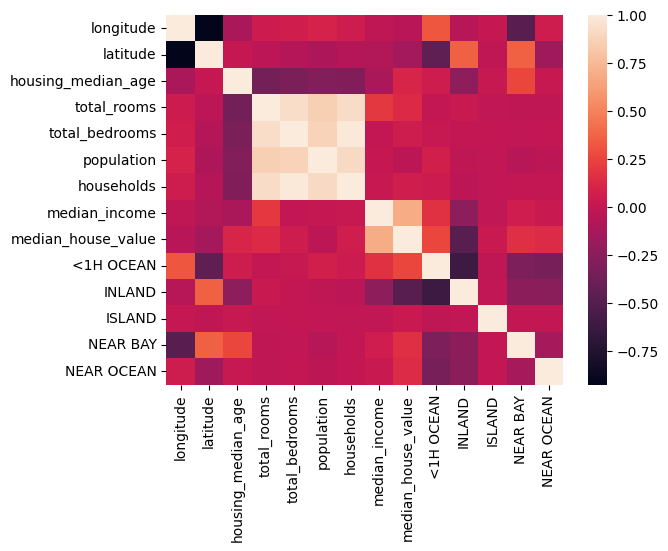

In [62]:
#New correlation matrix with ocean proximity included

sns.heatmap(train_data.corr())

plt.show()


<Axes: xlabel='latitude', ylabel='longitude'>

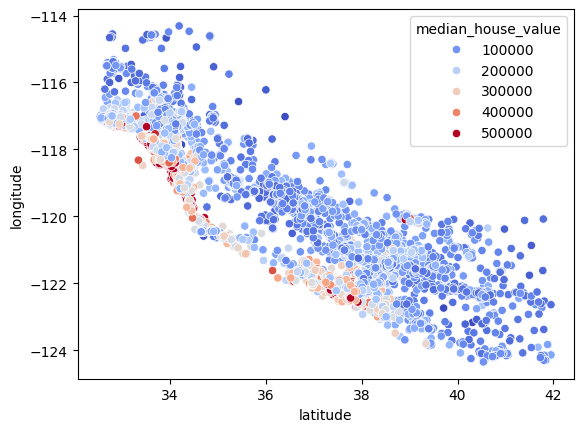

In [63]:
#Plots data points by location (latitude vs. longitude) 
sns.scatterplot(x="latitude",y="longitude",data=train_data,hue="median_house_value",palette="coolwarm")

## Linear Regression Model :

In [64]:
from sklearn.linear_model import LinearRegression

X,y = train_data.drop(["median_house_value"],axis=1),train_data["median_house_value"]


X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

from sklearn.preprocessing import StandardScaler

reg = LinearRegression()

reg.fit(X_train,y_train)

print(f"Regression score accuracy : {reg.score(X_test,y_test)}")

#reg.predict(a) to predict a


Regression score accuracy : 0.6407753744241311


## Random Forrest Model :

In [65]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(X_train,y_train)

print(f"Random forrest accuracy : {forest.score(X_test,y_test)}")

#forest.predict(a) to predict a


Random forrest accuracy : 0.8075316253677572
